# Install required libraries and [Contourf and cartopy issues resolved](https://linuxtut.com/en/8f0d69169dc6ab753e08/)


In [53]:
!pip install xarray
!pip install cartopy

!grep '^deb ' /etc/apt/sources.list | \
  sed 's/^deb /deb-src /g' | \
  tee /etc/apt/sources.list.d/deb-src.list
!apt-get -qq update

!grep '^deb ' /etc/apt/sources.list | \
  sed 's/^deb /deb-src /g' | \
  tee /etc/apt/sources.list.d/deb-src.list
!apt-get update

!apt-get -qq build-dep python3-cartopy
!apt-get -qq remove python-shapely python3-shapely

!pip install --no-binary shapely shapely --force
!pip install --no-binary cartopy cartopy==0.19.0

!pip list | grep Shapely

deb-src http://archive.ubuntu.com/ubuntu/ bionic main restricted
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates main restricted
deb-src http://archive.ubuntu.com/ubuntu/ bionic universe
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates universe
deb-src http://archive.ubuntu.com/ubuntu/ bionic multiverse
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates multiverse
deb-src http://archive.ubuntu.com/ubuntu/ bionic-backports main restricted universe multiverse
deb-src http://security.ubuntu.com/ubuntu/ bionic-security main restricted
deb-src http://security.ubuntu.com/ubuntu/ bionic-security universe
deb-src http://security.ubuntu.com/ubuntu/ bionic-security multiverse
deb-src https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/
deb-src http://archive.ubuntu.com/ubuntu/ bionic main restricted
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates main restricted
deb-src http://archive.ubuntu.com/ubuntu/ bionic universe
deb-src http://archive.ubuntu.com/ubun

ERROR: Could not find a version that satisfies the requirement cartopy==0.19.0 (from versions: 0.11.0, 0.12.0.4, 0.12.0.5, 0.13.0, 0.13.1, 0.14.0, 0.14.2, 0.15.1, 0.16.0, 0.17.0, 0.18.0b1, 0.18.0b2, 0.18.0rc1, 0.18.0, 0.19.0rc1, 0.19.0.post1, 0.20.0, 0.20.1, 0.20.2)
ERROR: No matching distribution found for cartopy==0.19.0
Shapely                       1.8.1.post1


In [54]:
import xarray as xr
import matplotlib.pyplot as plt # function in matplotlib that produces quick and easy plots
import cartopy.crs as ccrs # for projection
import cartopy.feature as cfeature # for map features 
from cartopy.util import add_cyclic_point
import numpy as np
import cartopy
import warnings 
warnings.filterwarnings('ignore')

In [55]:
cartopy.__version__
!cat /etc/os-release

NAME="Ubuntu"
VERSION="18.04.5 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.5 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


# Precipitation Analysis - Part II!
- In this assignment, you'll use the same data as your last assignment
<br><br>
- First, you'll pick up right where you left off in the last assignment, and do some comparison operations using UIUC data (precipitation, over time, just at one location)
<br><br>
- Then, we'll switch gears
<br><br>
- To considering United-States-wide data instead of UIUC data....so now our data that has a spatial component, among others. So, now we're working with more dimensions than we were when just looking at precipitation for the UIUC gridpoint, yes?
<br><br>
- This will include doing additional logical/comparisons operations
<br><br>
- AND creating maps of the results of those operations!

## First things first: copy and paste your cells from Week 4 Assignment to the start of this assignment, before this assignment's questions!

In [56]:
# open_dataarray is one of the main functions in Xarray to open a Netcdf file!
# the other function is open_dataset.  If our netcdf file contained MULTIPLE variables
# say, precip, and temperature, etc.
# we would instead open it as a dataset, and access specific variables separately
data = xr.open_dataset('precip.V1.0.2020.nc')

lat2 = data['lat'] # these are *coordinate* variables in the Netcdf file
                          # they are affiliated with the data array, 'data'
                          # and thus we can access them like this!
print(lat2)
lon2 = data['lon']
print(lon2)
times2 = data['time']
print(times2)

precip = data['precip'].values # nifty function that converts the Xarray data array variable into a NumPy array
# 'precip' contains all the precip data, fyi
lat = lat2.values # values of the latitude coordinate variable
lon = lon2.values # values of the longitude coordinate variable

# (a.) Convert from mm of daily precip to inches using an array operation (i.e., not a loop, of course, and simply a SINGLE line of code!)
precip = precip * 0.0393701 # 0.0393701 is the conversion factor from mm to inches
print(f"The precip array in inches is: {precip}")

# (a.) Find, using code and NO HARDWIRING/MANUAL WORK, the indices of the nearest gridpoint to the UIUC campus. Save these indices to new variables, and print out the values. 
lat_uiuc = 40.1
# lon of uiuc in eastward direction
lon_uiuc = -88.2 + 360
# find the index of the nearest gridpoint to the uiuc lat and lon from the lat and lon arrays
index_lat = np.abs(lat - lat_uiuc).argmin()
index_lon = np.abs(lon - lon_uiuc).argmin()
# print the index of the nearest gridpoint to the uiuc lat and lon
print(f"The index of the nearest gridpoint to the uiuc lat and lon is: {index_lat}, {index_lon}")

# (c.) Index your precip array so that you are only accessing data at this special location.
#      (i.e., at the gridpoint nearest to the UIUC campus)
# precip has dimensions time, lat, lon
precip_uiuc = precip[:, index_lat, index_lon]


<xarray.DataArray 'lat' (lat: 120)>
array([20.125, 20.375, 20.625, 20.875, 21.125, 21.375, 21.625, 21.875, 22.125,
       22.375, 22.625, 22.875, 23.125, 23.375, 23.625, 23.875, 24.125, 24.375,
       24.625, 24.875, 25.125, 25.375, 25.625, 25.875, 26.125, 26.375, 26.625,
       26.875, 27.125, 27.375, 27.625, 27.875, 28.125, 28.375, 28.625, 28.875,
       29.125, 29.375, 29.625, 29.875, 30.125, 30.375, 30.625, 30.875, 31.125,
       31.375, 31.625, 31.875, 32.125, 32.375, 32.625, 32.875, 33.125, 33.375,
       33.625, 33.875, 34.125, 34.375, 34.625, 34.875, 35.125, 35.375, 35.625,
       35.875, 36.125, 36.375, 36.625, 36.875, 37.125, 37.375, 37.625, 37.875,
       38.125, 38.375, 38.625, 38.875, 39.125, 39.375, 39.625, 39.875, 40.125,
       40.375, 40.625, 40.875, 41.125, 41.375, 41.625, 41.875, 42.125, 42.375,
       42.625, 42.875, 43.125, 43.375, 43.625, 43.875, 44.125, 44.375, 44.625,
       44.875, 45.125, 45.375, 45.625, 45.875, 46.125, 46.375, 46.625, 46.875,
       47.125, 4

#### (1)  USING ONLY DATA FOR THAT SINGLE GRIDPOINT NEAREST URBANA-CHAMPAIGN, calculate the following statistics for precip:
  - (a.) How many days did no precip fall?
<br><br>
  - (b.) How many days did more than one inch fall?
<br><br>
  - (c.) What was the maximum amount of precip that fell?
<br><br>
  - (d.) What day did this maximum amount of precip fall?

In [57]:
np.sum(precip_uiuc == 0)

210

In [58]:
# (a.) how many days did no precip fall for the precip_uiuc?
print(f"The number of days with no precip is: {np.count_nonzero(precip_uiuc == 0)}")

The number of days with no precip is: 210


In [59]:
#  (b.) how many days did more than one inch fall?
print(f"The number of days with more than one inch of precip is: {np.count_nonzero(precip_uiuc > 1)}")


The number of days with more than one inch of precip is: 8


In [60]:
# (c.) what was the maximum amount of precip that fell?
print(f"The maximum amount of precip that fell is: {np.max(precip_uiuc)} inches")    

The maximum amount of precip that fell is: 2.5155837535858154 inches


In [61]:
# (d.) what day did it occur on?
index_max_precip = np.argmax(precip_uiuc)
print(f"The day of the maximum amount of precip that fell is: {times2[index_max_precip].values}") 

The day of the maximum amount of precip that fell is: 2020-06-04T00:00:00.000000000


### !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
### FOR THE REST OF THIS ASSIGNMENT YOU ARE USING YOUR FULL PRECIPITATION DATASET, I.E., THE 3D DATA, NOT A 1D TIME SERIES OF PRECIPITATION DATA FROM UIUC LIKE YOU USED IN Q1
### !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#### (2)  As you may have noticed if you've played around with outputting some precip values, our array consists of NaNs in the ocean locations
- (a.) create a mask that identifies and masks out NaNs, and save your masked variable to a new variable - *you learned a formal way to do this in your lessons this week!*
<br><br>
- (b.) print out the masked variable, the mask itself, and your original data
<br><br>
- (c.) this is prep for the next question, when we're considering data in all locations, not just at UIUC where there is no missing data, and don't want to deal with NaNs

In [62]:
# - (a.) create a mask that identifies and masks out NaNs, and save your masked variable to a new variable - *you learned a formal way to do this in your lessons this week!*
masked_precip = np.ma.masked_invalid(precip)


In [63]:
# - (b.) print out the masked variable, the mask itself, and your original data
print(f"The masked precip array is: {masked_precip}")
print(f"The mask of the masked precip array is: {masked_precip.mask}")
print(f"The original precip array is: {masked_precip.data}")


The masked precip array is: [[[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 ...

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -

In [64]:
# get the shape of the masked precip array
masked_precip.shape

(366, 120, 300)

#### (3)  Now, calculate and plot each of the following (on a 2D, shaded contour plot that includes a map), USING YOUR MASKED DATA FROM 2(a)
  - (a.) the average Jan precip at each location 
<br><br>
  - (b.) cumulative precipitation in 2020 at each location - i.e., the TOTAL precipitation that fell during the year 2020 at each location
<br><br>
  - (c.) the number of days in 2020 when no precipitation was recorded, at each location  

***Do not use any for loops!***

*Specific plotting requirements. For each plot, you should*:
 - use object-oriented plotting 
 - create a filled contour plot of the given quantity that you calculate earlier in this Q
 - on a *map* using Cartopy 
 - with a colorbar, using a colormap of your choice that you explicitly set
 - and labels for colorbar, plot axes, title, etc.

####  Then - don't forget to do some interpretation of your plots in (d.) and (e.)!

  - (d.) *Interpret*: which parts of the country experience the greatest total (cumulative) January precipitation? 
<br><br>
  - (e.)  *Interpret*: which parts of the country experience the most days with NO precipitation?  Comment on how this does or does not line up with your understanding of United States geography and features.


In [65]:
# Now, calculate and plot each of the following (on a 2D, shaded contour plot that includes a map), USING YOUR MASKED DATA FROM 2(a)
# - (a.) the average Jan precip at each location 
# the masked precip array has dimensions time, lat, lon
# the january month has 31 days. So, the average would be the sum of the masked precip array divided by 31
jan_precip = np.sum(masked_precip[:31, :, :], axis=0) / 31
# print the shape of the jan_precip array
print(f"The shape of the jan_precip array is: {jan_precip.shape}")
print(f"The jan_precip array is: {jan_precip}")

The shape of the jan_precip array is: (120, 300)
The jan_precip array is: [[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


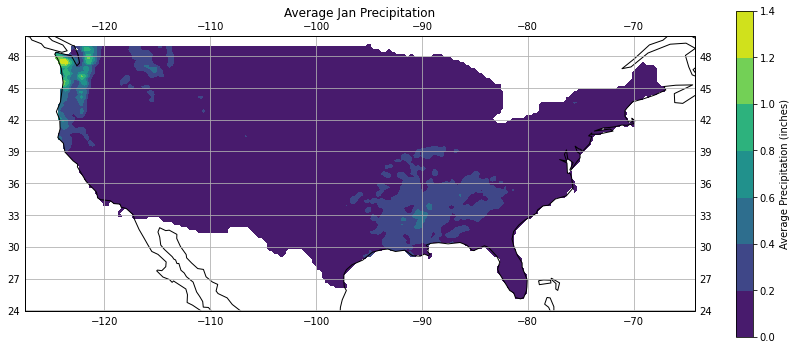

In [68]:
proj=ccrs.PlateCarree() # this is a very common projection, but not the only one!

#Create a figure with an axes object on which we will plot. Pass the projection to that axes
fig, ax = plt.subplots(figsize=(15,15),subplot_kw=dict(projection=proj))

# Grab our lat and lon coordinate variables from the Netcdf file
lon = data['lon']
lat = data['lat'] 

# Add cyclic point since there's a data gap in this data set at the Prime Meridian
jan_precip2, lon2 = add_cyclic_point(jan_precip, coord=lon)
# use a new variable for our now-modified temperature and longitude variables b/c if we don't and re-run just this cell
# multiple times, you'll keep adding a longitude point (oops!)

# Create our grid
# contourf needs this so it understands the grid it is plotting on
X, Y = np.meshgrid(lon2, lat) # using our slightly modified longitude

# Create our contour plot!
cs = ax.contourf(X,Y,jan_precip2,transform=proj) # good practice to also specify the transform, as otherwise
                                                  # Cartopy assumes your transform is whatever your projection is
                                                  # this may not always be true
                                                  # more on this later

# Create our colorbar
cb=fig.colorbar(cs,shrink=0.4) # shrink option does what it sounds like to the colorbar!
 # set the colorbar label
cb.set_label("Average Precipitation (inches)")

# The temperature is in Kelvin

# Some options involving the gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Add coastlines!
ax.coastlines()

# Add a title!
ax.set_title('Average Jan Precipitation')
# Make title a bit bigger and a bit more readable and keep its location to the top
ax.title.set_position([.5, 1.05])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.tight_layout()

In [69]:
#   - (b.) cumulative precipitation in 2020 at each location - i.e., the TOTAL precipitation that fell during the year 2020 at each location
cumulative_precip = np.sum(masked_precip, axis=0)
print(f"The shape of the cumulative_precip array is: {cumulative_precip.shape}")

The shape of the cumulative_precip array is: (120, 300)


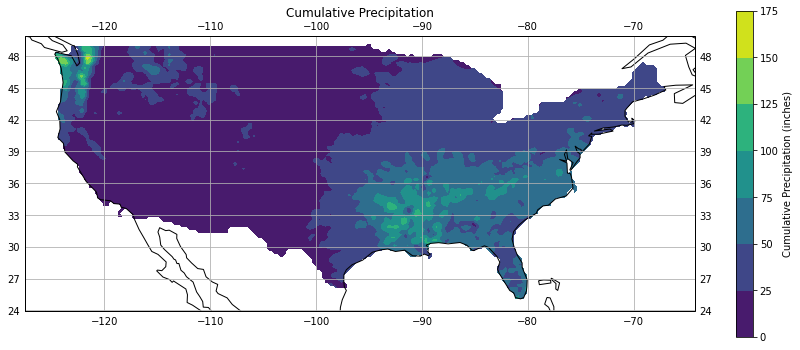

In [70]:
proj=ccrs.PlateCarree() # this is a very common projection, but not the only one!

#Create a figure with an axes object on which we will plot. Pass the projection to that axes
fig, ax = plt.subplots(figsize=(15,15),subplot_kw=dict(projection=proj))

# Grab our lat and lon coordinate variables from the Netcdf file
lon = data['lon']
lat = data['lat'] 

# Add cyclic point since there's a data gap in this data set at the Prime Meridian
cumulative_precip2, lon2 = add_cyclic_point(cumulative_precip, coord=lon)
# use a new variable for our now-modified temperature and longitude variables b/c if we don't and re-run just this cell
# multiple times, you'll keep adding a longitude point (oops!)

# Create our grid
# contourf needs this so it understands the grid it is plotting on
X, Y = np.meshgrid(lon2, lat) # using our slightly modified longitude

# Create our contour plot!
cs = ax.contourf(X,Y,cumulative_precip2,transform=proj) # good practice to also specify the transform, as otherwise
                                                  # Cartopy assumes your transform is whatever your projection is
                                                  # this may not always be true
                                                  # more on this later

# Create our colorbar
cb=fig.colorbar(cs,shrink=0.4) # shrink option does what it sounds like to the colorbar!
 # set the colorbar label
cb.set_label("Cumulative Precipitation (inches)")
# The temperature is in Kelvin

# Some options involving the gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Add coastlines!
ax.coastlines()

# Add a title!
ax.set_title('Cumulative Precipitation')
# Make title a bit bigger and a bit more readable and keep its location to the top
ax.title.set_position([.5, 1.05])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()

In [72]:
#   - (c.) the number of days in 2020 when no precipitation was recorded, at each location  
days_no_precip = np.count_nonzero(masked_precip == 0, axis=0)
print(f"The shape of the days_no_precip array is: {days_no_precip.shape}")

The shape of the days_no_precip array is: (120, 300)


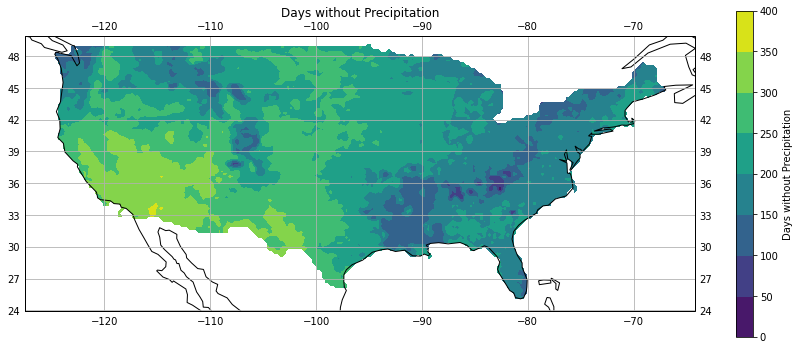

In [73]:
proj=ccrs.PlateCarree() # this is a very common projection, but not the only one!

#Create a figure with an axes object on which we will plot. Pass the projection to that axes
fig, ax = plt.subplots(figsize=(15,15),subplot_kw=dict(projection=proj))

# Grab our lat and lon coordinate variables from the Netcdf file
lon = data['lon']
lat = data['lat'] 

# Add cyclic point since there's a data gap in this data set at the Prime Meridian
days_no_precip2, lon2 = add_cyclic_point(days_no_precip, coord=lon)
# use a new variable for our now-modified temperature and longitude variables b/c if we don't and re-run just this cell
# multiple times, you'll keep adding a longitude point (oops!)

# Create our grid
# contourf needs this so it understands the grid it is plotting on
X, Y = np.meshgrid(lon2, lat) # using our slightly modified longitude

# Create our contour plot!
cs = ax.contourf(X,Y,days_no_precip2,transform=proj) # good practice to also specify the transform, as otherwise
                                                  # Cartopy assumes your transform is whatever your projection is
                                                  # this may not always be true
                                                  # more on this later

# Create our colorbar
cb=fig.colorbar(cs,shrink=0.4) # shrink option does what it sounds like to the colorbar!
 # set the colorbar label
cb.set_label("Days without Precipitation")

# Some options involving the gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Add coastlines!
ax.coastlines()

# Add a title!
ax.set_title('Days without Precipitation')
# Make title a bit bigger and a bit more readable and keep its location to the top
ax.title.set_position([.5, 1.05])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.tight_layout()

- (d.) *Interpret*: which parts of the country experience the greatest total (cumulative) precipitation? 
<br><br>

By looking at the plot of (b.) above, we can see that the most total precipitation is in the southern part of the country, especially in the south-east. I could also see that the most total precipitation also occurs in the north-west part of the country (Seattle, I have heard from my friends that it's always raining in Seattle).

<br><br>
  - (e.)  *Interpret*: which parts of the country experience the most days with NO precipitation?  Comment on how this does or does not line up with your understanding of United States geography and features.

  By looking at the plot of (c.) above, we can see that the most days with no precipitation occurs from south-west, middle-west. This is consistent with my observation that the dry states are in the south-west of the country like Nevada, Utah, Arizona, California and Texas.